In [39]:
# PASO 1 -> Carga de los datos y librerías necesarias

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [40]:
# PASO 2 -> Cargar y revisar los datos

# Cargar el dataset
df = pd.read_csv('https://raw.githubusercontent.com/aliciacaminero/Gemali_Cars/refs/heads/main/Inicio/dataset_limpio.csv')

# Ver las primeras filas para obtener una visión general
df.head()


,make,model,version,fuel,year,kms,power,shift,price,publish_date,update_date,dealer_name,dealer_address,dealer_zip_code,dealer_city,dealer_website,date,province
0,Opel,Crossland,1.2 GAS 110 GS Line 5p S/S,Gasolina,2022,5.0,110.0,manual,22900,2023-02-04,2023-02-04,Sergio Y.,"2, Carrer de Jacint Benavente, Poblenou, Pined...",8397.0,Pineda de Mar,www.cocheauto.com,2023-02-06,Barcelona
1,Opel,Crossland,1.2 81kW (110CV) GS Line,Gasolina,2022,24847.0,110.0,manual,19990,2023-01-20,2023-02-06,Peugeot Alcala 534,"Avenida de José Gárate, Coslada, Área metropol...",28823.0,Coslada,www.alcala534.com/es/vehiculos-ocasion,2023-02-06,Madrid
2,Opel,Crossland,1.5D 88kW (120CV) Business Elegance Auto,Diésel,2021,41356.0,120.0,automatic,18590,2022-11-30,2023-02-06,Clicars S.,"San Cristóbal, Avenida de Andalucía, San Crist...",28021.0,Madrid,www.clicars.com/,2023-02-06,Madrid
3,Opel,Crossland,GS-Line 1.2 GAS MT6 S/S 110cv,Gasolina,2022,11.0,110.0,manual,22700,2022-11-29,2023-02-06,Vallescar S.,"Parc de Bombers de Sabadell, 52, Carretera de ...",8200.0,Sabadell,https://www.vallescarocasion.es/,2023-02-06,Barcelona
4,Opel,Crossland,GS-Line 1.2 GAS MT6 S/S 110cv,Gasolina,2022,11.0,110.0,manual,22700,2022-11-29,2023-02-06,Vallescar Ocasion M.,"27, Carrer de Fèlix Ferran, Mollet del Vallès,...",8100.0,Mollet del Vallès,https://www.vallescarocasion.es/,2023-02-06,Barcelona


In [41]:
#PASO 3 -> Revisión de columnas y tipos de datos

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   make             100000 non-null  object 
 1   model            100000 non-null  object 
 2   version          99842 non-null   object 
 3   fuel             96810 non-null   object 
 4   year             100000 non-null  int64  
 5   kms              99189 non-null   float64
 6   power            99709 non-null   float64
 7   shift            98982 non-null   object 
 8   price            100000 non-null  int64  
 9   publish_date     100000 non-null  object 
 10  update_date      100000 non-null  object 
 11  dealer_name      99908 non-null   object 
 12  dealer_address   99908 non-null   object 
 13  dealer_zip_code  99908 non-null   float64
 14  dealer_city      99908 non-null   object 
 15  dealer_website   79913 non-null   object 
 16  date             100000 non-null  objec

In [42]:
# PASO 4 -> Limpieza de datos

# Las columnas como dealer_name, dealer_address, dealer_zip_code, dealer_city, dealer_website pueden no ser necesarias, ya que no aportan directamente a la predicción del precio del coche.

df = df.drop(columns=['dealer_name', 'dealer_address', 'dealer_zip_code', 'dealer_city', 'dealer_website'])

# Tampoco creo que hagan falta las de las fechas de publicacion y la provincia tampoco

df = df.drop(columns=['publish_date', 'update_date', 'date', 'province'])

# cambiamos el Dtype de algunas columnas

# Convertir las fechas
#df['publish_date'] = pd.to_datetime(df['publish_date'])
#df['update_date'] = pd.to_datetime(df['update_date'])
#df['date'] = pd.to_datetime(df['date'])

# Convertir 'shift' a categoría si tiene pocos valores únicos
df['shift'] = df['shift'].astype('category')

# Verificar los tipos de datos
print(df.dtypes)

make         object
model        object
version      object
fuel         object
year          int64
kms         float64
power       float64
shift      category
price         int64
dtype: object


In [43]:
# Ver cuántos valores nulos hay por columna
df.isnull().sum()

#elimino las filas con valores nulos

df.dropna(inplace=True) 
#df.drop_duplicates() -> para asegurarme de que no se eliminen coches con versiones similares pero de diferentes años

# Normalizar la columna 'version'
#df['version'] = df['version'].str.lower()  # Convertir todo a minúsculas -> no me quita filas
#df['version'] = df['version'].str.replace(r'[^a-z0-9\s]', '', regex=True)  # Eliminar caracteres especiales -> no me quita filas

# Eliminar duplicados basados en las columnas clave: make, model, version y year
df = df.drop_duplicates(subset=['make', 'model', 'version', 'year', 'kms', 'power', 'shift', 'price'])


In [44]:
#PASO 5 -> Análisis Estadístico Básico

# Resumen estadístico de las columnas numéricas
df.describe()

,year,kms,power,price
count,12453.000000,1.245300e+04,12453.000000,12453.000000
mean,2015.620493,9.839957e+04,176.823737,19904.755481
std,5.374928,7.247933e+04,3231.115296,23413.420944
min,1967.000000,0.000000e+00,0.000000,0.000000
25%,2014.000000,4.471600e+04,100.000000,9290.000000
50%,2017.000000,8.700000e+04,120.000000,15300.000000
75%,2019.000000,1.367160e+05,150.000000,23400.000000
max,2023.000000,1.330000e+06,360571.000000,498000.000000


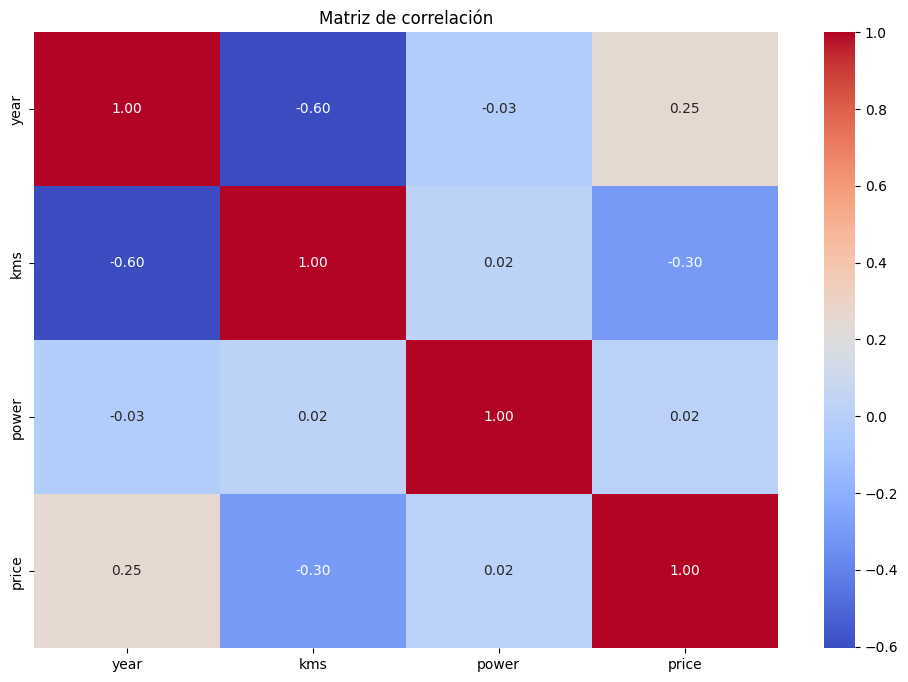

In [45]:
#PASO 6 -> Análisis de correlaciones

# Crear un mapa de calor de la correlación, el mapa de calor solo se puede aplicar a columnas numericas

# Paso 1: Separar columnas numéricas y categóricas
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Paso 2: Filtrar el DataFrame con solo columnas numéricas
df_numerical = df[numerical_columns]

# Paso 3: Calcular la matriz de correlación solo para columnas numéricas
correlation_matrix = df_numerical.corr()


# Visualizar la correlación con un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación')
plt.show()

In [46]:
'''

KMS - AÑOS hay una moderada correlacion negativa por lo que cuando una sube la otra baja

En este caso, la relación tiene sentido si consideramos cómo funcionan las ventas de coches usados:

Coches más nuevos tienden a tener menos kilómetros: Generalmente, un coche más reciente (un año mayor) tendrá menos kilómetros recorridos porque ha sido usado menos tiempo. Por ejemplo, un coche de 2022 tendrá menos kilómetros recorridos que un coche de 2018, simplemente porque ha estado menos tiempo en circulación.
Coches más viejos tienden a tener más kilómetros: En cambio, un coche más antiguo (como uno de 2018) puede haber recorrido más kilómetros porque ha estado en uso durante más tiempo.

'''

'\n\nKMS - AÑOS hay una moderada correlacion negativa por lo que cuando una sube la otra baja\n\nEn este caso, la relación tiene sentido si consideramos cómo funcionan las ventas de coches usados:\n\nCoches más nuevos tienden a tener menos kilómetros: Generalmente, un coche más reciente (un año mayor) tendrá menos kilómetros recorridos porque ha sido usado menos tiempo. Por ejemplo, un coche de 2022 tendrá menos kilómetros recorridos que un coche de 2018, simplemente porque ha estado menos tiempo en circulación.\nCoches más viejos tienden a tener más kilómetros: En cambio, un coche más antiguo (como uno de 2018) puede haber recorrido más kilómetros porque ha estado en uso durante más tiempo.\n\n'

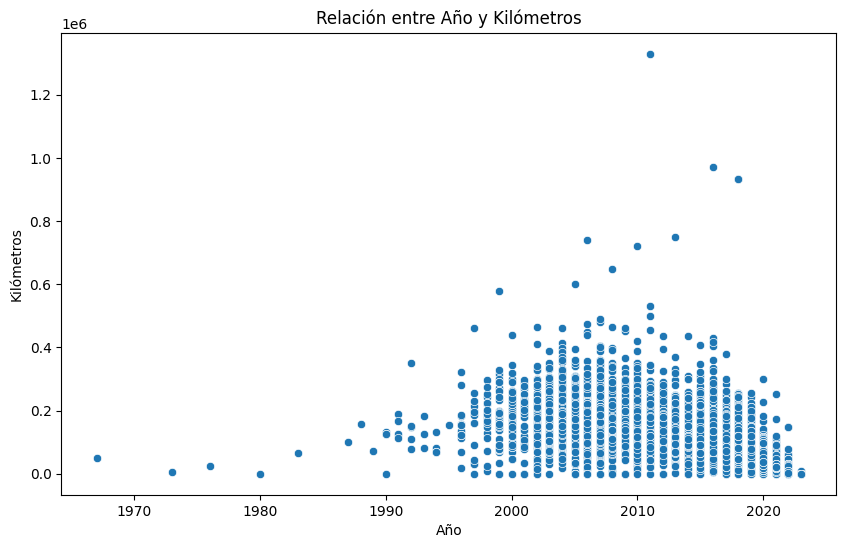

In [47]:
# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='year', y='kms')
plt.title('Relación entre Año y Kilómetros')
plt.xlabel('Año')
plt.ylabel('Kilómetros')
plt.show()

In [48]:
'''
KMS - PRICE es debil -0,29

Correlación negativa: Al igual que en el caso anterior, el valor negativo sugiere que, a medida que los kilómetros (kms) aumentan, el precio (price) tiende a disminuir, pero esta relación no es fuerte.
Correlación baja: Un valor de -0.29 indica que la relación es débil. Es decir, aunque los coches con más kilómetros tienden a tener precios más bajos, no es una regla estricta. Hay una cierta tendencia, pero hay mucha variabilidad.
'''

'\nKMS - PRICE es debil -0,29\n\nCorrelación negativa: Al igual que en el caso anterior, el valor negativo sugiere que, a medida que los kilómetros (kms) aumentan, el precio (price) tiende a disminuir, pero esta relación no es fuerte.\nCorrelación baja: Un valor de -0.29 indica que la relación es débil. Es decir, aunque los coches con más kilómetros tienden a tener precios más bajos, no es una regla estricta. Hay una cierta tendencia, pero hay mucha variabilidad.\n'

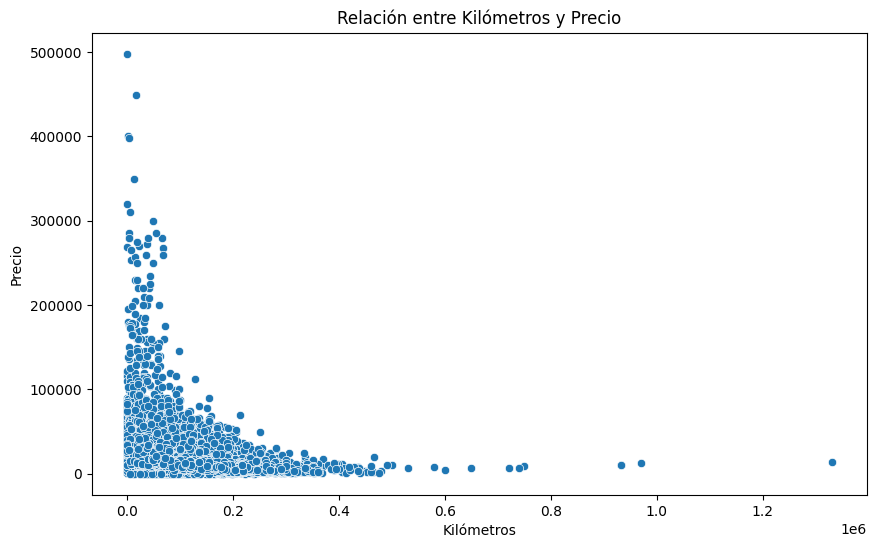

In [49]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='kms', y='price')
plt.title('Relación entre Kilómetros y Precio')
plt.xlabel('Kilómetros')
plt.ylabel('Precio')
plt.show()

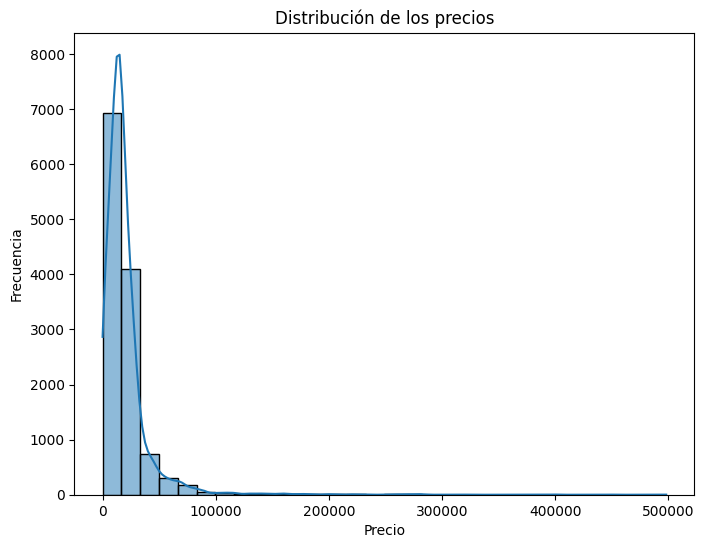

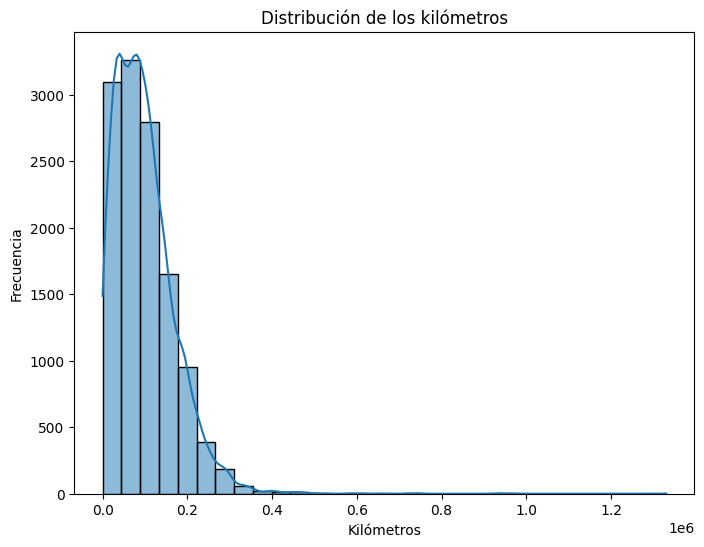

In [50]:
#PASO 7 -> Distribución de las variables

# Distribución del precio
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribución de los precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

# Distribución de kilómetros
plt.figure(figsize=(8, 6))
sns.histplot(df['kms'], bins=30, kde=True)
plt.title('Distribución de los kilómetros')
plt.xlabel('Kilómetros')
plt.ylabel('Frecuencia')
plt.show()

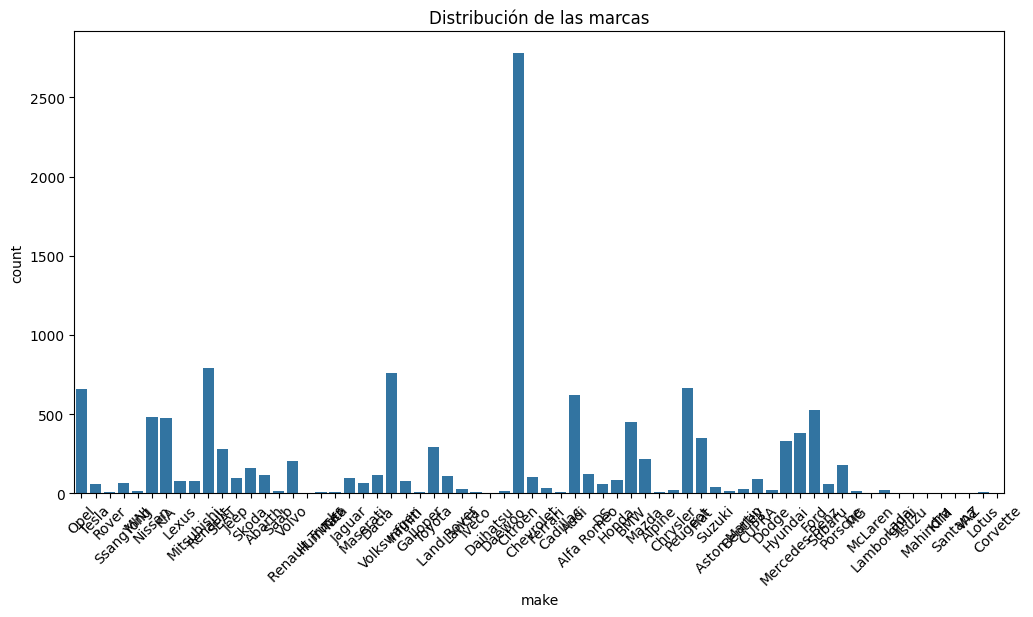

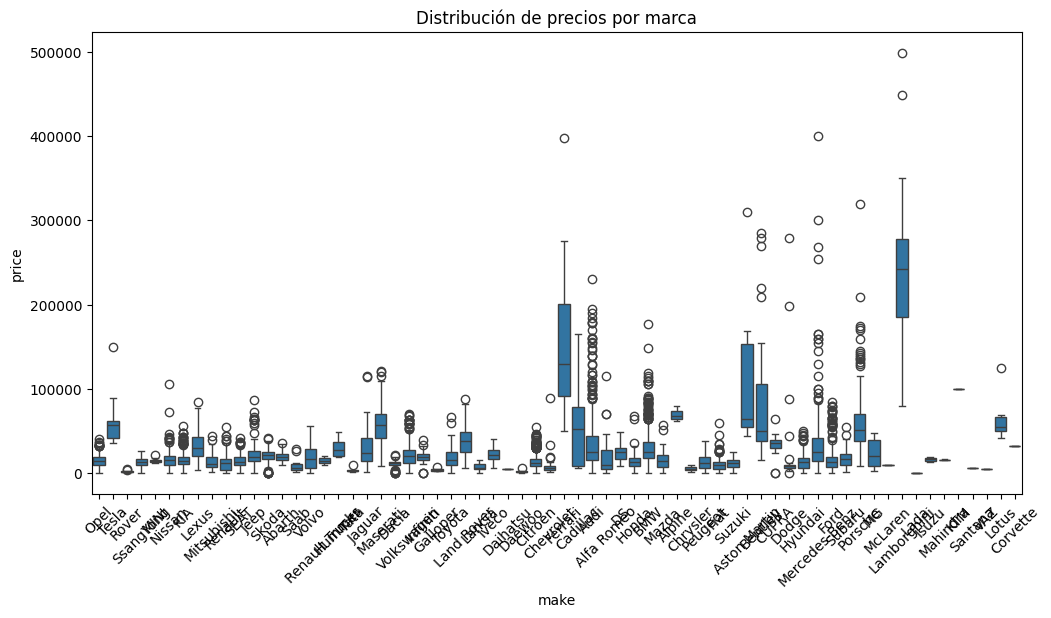

In [51]:
#PASO 8 -> Análisis de variables categoricas

# Distribución de las marcas
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='make')
plt.title('Distribución de las marcas')
plt.xticks(rotation=45)
plt.show()

# Precio medio por marca
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='make', y='price')
plt.title('Distribución de precios por marca')
plt.xticks(rotation=45)
plt.show()

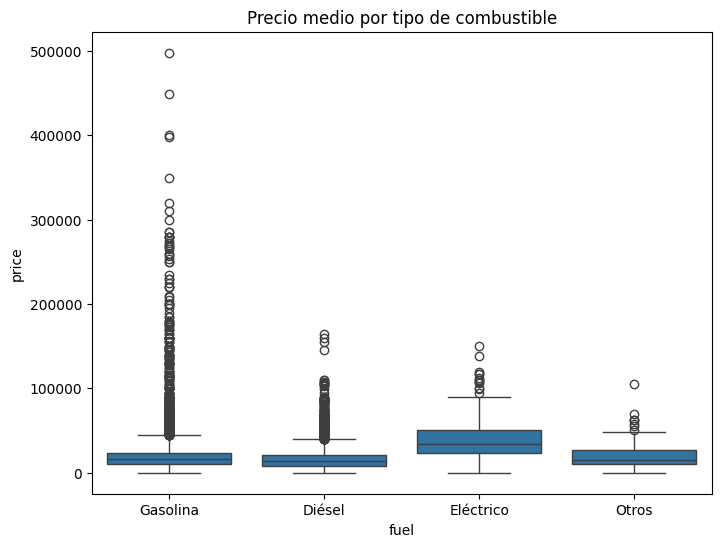

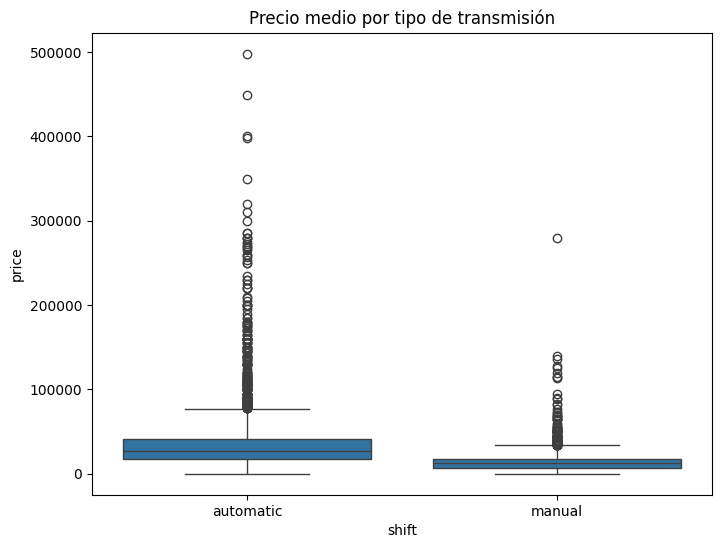

In [52]:
#PASO 9 -> Verificar la relación entre variables categoricas y el precio

# Precio medio por tipo de combustible
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='fuel', y='price')
plt.title('Precio medio por tipo de combustible')
plt.show()

# Precio medio por transmisión
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='shift', y='price')
plt.title('Precio medio por tipo de transmisión')
plt.show()

In [53]:
'''Paso 10: Conclusión del EDA
Con el análisis anterior, habrás identificado qué variables están relacionadas con el precio y si hay alguna transformación o limpieza adicional necesaria antes de construir tu modelo. También habrás identificado las variables que no aportan mucho y que pueden ser eliminadas.

Pasos finales
Una vez hecho este análisis exploratorio, ya tendrás una idea clara de qué columnas mantener, eliminar, o transformar. Luego, puedes proceder a la construcción del modelo de predicción de precios como lo describí en el primer paso.

Si necesitas más detalles sobre algún paso o algún gráfico específico, no dudes en preguntar. ¡Estoy aquí para ayudarte!'''

'Paso 10: Conclusión del EDA\nCon el análisis anterior, habrás identificado qué variables están relacionadas con el precio y si hay alguna transformación o limpieza adicional necesaria antes de construir tu modelo. También habrás identificado las variables que no aportan mucho y que pueden ser eliminadas.\n\nPasos finales\nUna vez hecho este análisis exploratorio, ya tendrás una idea clara de qué columnas mantener, eliminar, o transformar. Luego, puedes proceder a la construcción del modelo de predicción de precios como lo describí en el primer paso.\n\nSi necesitas más detalles sobre algún paso o algún gráfico específico, no dudes en preguntar. ¡Estoy aquí para ayudarte!'

In [54]:
df.to_csv('df_EDA_predicprecio.csv', index=False)